In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA



In [2]:
penguins_df = pd.read_csv('penguindata.csv')
penguins_df= penguins_df[['Species','Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)','Body Mass (g)',\
    'Delta 15 N (o/oo)','Delta 13 C (o/oo)']]
penguins_df = penguins_df.dropna()

X = penguins_df._get_numeric_data().values
y = penguins_df[['Species']]


species = {'Adelie Penguin (Pygoscelis adeliae)': 0, 'Gentoo penguin (Pygoscelis papua)': 1, 'Chinstrap penguin (Pygoscelis antarctica)': 2}
y = [species[item] for item in y['Species']]
y = np.array(y) 

ss = StandardScaler()
X = ss.fit_transform(X) 

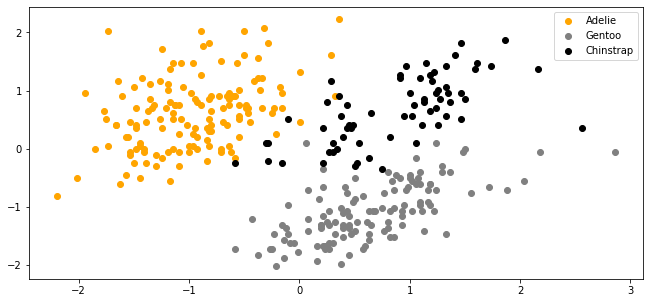

In [3]:
plt.figure(figsize=(11, 5))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='orange', label='Adelie')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='gray', label='Gentoo')
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color='black', label='Chinstrap')

plt.legend();



In [4]:
kmeans = KMeans(n_clusters=3, random_state=0)
kclusters = kmeans.fit_predict(X)
print(accuracy_score(kclusters, y))



0.9757575757575757


In [5]:
dbscan = DBSCAN(eps=1,min_samples=8).fit(X)
df_result = dbscan.labels_
# df_result = pd.DataFrame(dbscan.labels_)
print(accuracy_score(df_result, y))

0.33636363636363636


In [6]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
X_reduced = pd.DataFrame(X_reduced)

dbscan=DBSCAN(eps=.37, min_samples=9).fit(X_reduced) 
df_result = dbscan.labels_
# df_result = pd.DataFrame(dbscan.labels_)
print(accuracy_score(df_result, y))

0.32727272727272727
